<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Web_scraping_Getting_started_with_BeautifulSoup_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A gentle introduction into the field of **Web Scraping**

> **Web scraping**, **web harvesting**, or **web data extraction** is data scraping used for extracting data from websites. Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis. ([Wikipedia](https://en.wikipedia.org/wiki/Web_scraping))
---

Web scraping in Python is getting easy with **Beautifulsoup** (bs4).  


> Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree. ([pypi.org](https://pypi.org/project/beautifulsoup4/))  

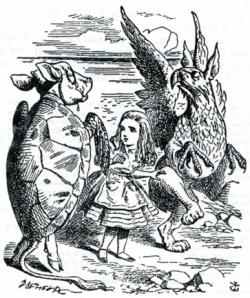






More information about bs4 & Beautifulsoup : [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

## 1 Objectives
- Getting started with Beautifulsoup
- Access to url
- Identify useful data
- Retrieve data


##2 Getting started with Beautifulsoup




###2.1 Import the librairies

In [ ]:
import requests # access to url
from bs4 import BeautifulSoup # extract data from url
import pandas as pd #data wrangling

###2.2 Process
Web scraping in Python is getting easy with Beautifulsoup and the following process may be applied to retrieve data :
- Make a request to the targeted url
- Transform the content of the request into a Beautifulsoup' object, named `soup`
- Navigate through the soup
- Identify and retrieve the needed data

##3 Access to url


###3.1 First step : make a request
The first step consists in making a request to the targeted url.  
In the following example we are going to extract main news of Le Monde, a French online newspaper.

In [ ]:
url = 'https://www.lemonde.fr/'
print(url)

req = requests.get(url)
print(req)

https://www.lemonde.fr/
<Response [200]>


The request has several status :
- 1xx informational response – the request was received, continuing process
- 2xx successful – the request was successfully received, understood, and accepted
- 3xx redirection – further action needs to be taken in order to complete the request
- 4xx client error – the request contains bad syntax or cannot be fulfilled
- 5xx server error – the server failed to fulfil an apparently valid request

More information on [Wikipedia](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes).

###3.2 Extract content
When the request is successful, extract content of the url is made easy from the `request` object.

In [ ]:
req.text

'         <!DOCTYPE html> <html lang="fr" prefix="og: http://ogp.me/ns#"> <head> <meta charset="UTF-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"> <meta name="referrer" content="no-referrer-when-downgrade">   <script class="_iub_cs_activate" type="text/plain" data-iub-purposes="4" data-suppressedsrc="//www.lemonde.fr/bucket/ce47fe6e15f83b340cbafc22ec5034cd678722f6/js/chartbeatMab.bundle.js" async="1"></script>   <link rel="manifest" href="/manifest.json">  <script>\nif(sessionStorage.fontsFirst&&sessionStorage.fontsLast&&\'fonts\'in document){document.documentElement.classList.add(\'fonts-loaded\');}\nif(typeof Promise===\'undefined\'){document.documentElement.classList.add(\'fonts-loaded\');}</script>   <link rel="preload" href="/bucket/ce47fe6e15f83b340cbafc22ec5034cd678722f6/css/icons.css" as="style" onload="this.onload=null;this.rel=\'stylesheet\'"> <noscript><link rel="stylesheet" hre

###3.3 Other information
Many useful information is available from the `request` object.

In [ ]:
print("Request' status : ", req.status_code)
print("Request' status : ", req.encoding)
print("Request' status : ", req.connection)
print("Request' status : ", req.headers)
print("Request' status : ", req.content)

Request' status :  200
Request' status :  UTF-8
Request' status :  <requests.adapters.HTTPAdapter object at 0x7fb7466d1828>
Request' status :  {'Connection': 'keep-alive', 'Content-Type': 'text/html; charset=UTF-8', 'X-Protected-By': 'Sqreen', 'Set-Cookie': 'critical-home-free-desktop=ab274739803bd5da69336959a448334d; expires=Wed, 23-Dec-2020 13:21:00 GMT; Max-Age=2592000; path=/; secure', 'X-Frame-Options': 'SAMEORIGIN', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Via': '1.1 google, 1.1 varnish, 1.1 varnish', 'Cache-Control': 'private, max-age=0', 'Accept-Ranges': 'bytes', 'Date': 'Mon, 23 Nov 2020 13:21:00 GMT', 'X-Served-By': 'cache-cdg20765-CDG, cache-wdc5560-WDC', 'X-Cache': 'MISS, MISS', 'X-Cache-Hits': '0, 0', 'X-Timer': 'S1606137661.768184,VS0,VE142', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31557600', 'transfer-encoding': 'chunked'}
Request' status :  []
Request' status :  b'         <!DOCTYPE html> <html lang="fr" prefix="og: http

The `.content` attribute provides the full web page of the url.

##4 Identify useful data


###4.1 Make a soup
Transform the content of the request into a Beautifulsoup' object, named `soup`.
**Make a (beautiful) soup** : get the content from your url.

In [ ]:
soup = BeautifulSoup(req.text, "lxml")
print(soup)

<!DOCTYPE html>
<html lang="fr" prefix="og: http://ogp.me/ns#"> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/> <meta content="no-referrer-when-downgrade" name="referrer"/> <script async="1" class="_iub_cs_activate" data-iub-purposes="4" data-suppressedsrc="//www.lemonde.fr/bucket/ce47fe6e15f83b340cbafc22ec5034cd678722f6/js/chartbeatMab.bundle.js" type="text/plain"></script> <link href="/manifest.json" rel="manifest"/> <script>
if(sessionStorage.fontsFirst&&sessionStorage.fontsLast&&'fonts'in document){document.documentElement.classList.add('fonts-loaded');}
if(typeof Promise==='undefined'){document.documentElement.classList.add('fonts-loaded');}</script> <link as="style" href="/bucket/ce47fe6e15f83b340cbafc22ec5034cd678722f6/css/icons.css" onload="this.onload=null;this.rel='stylesheet'" rel="preload"/> <noscript><link href="/bucket/ce47fe6e15f83b340cbafc22ec503

###4.2 The data
The data we want to retrieve is the main article from the online newspaper.  
By visiting the website, we identified that the main article has the property `class=article article--main`.

In [ ]:
print(soup.find("div", { "class" : "article article--main" }))#.find("div", { "class" : "points" })

<div class="article article--main"> <a href="https://www.lemonde.fr/police-justice/article/2020/11/22/affaire-des-ecoutes-nicolas-sarkozy-thierry-herzog-et-gilbert-azibert-sur-le-banc-des-prevenus_6060722_1653578.html"> <span class="icon__premium icon--outside"><span class="sr-only">Article réservé à nos abonnés</span></span><h1 class="article__title"><span class="article__title-label">Le procès des écoutes de Nicolas Sarkozy s’est ouvert : une amitié et des intérêts en partage</span> </h1> <div class="article__media-container"> <picture class="article__media"> <img height="281" src="https://img.lemde.fr/2020/11/23/0/0/5472/3648/421/0/75/0/7481275_49424731edc5420e949eeab1d0b23287-49424731edc5420e949eeab1d0b23287-0.jpg" srcset="https://img.lemde.fr/2020/11/23/0/0/5472/3648/664/0/75/0/7481275_49424731edc5420e949eeab1d0b23287-49424731edc5420e949eeab1d0b23287-0.jpg 664w, https://img.lemde.fr/2020/11/23/0/0/5472/3648/421/0/75/0/7481275_49424731edc5420e949eeab1d0b23287-49424731edc5420e949eea

##5.Retrieve data
We previously identify the node of interest : the pivot point from which we could retrieve some information.
###5.1 Title of the main article


In [ ]:
print("The main article is titled: ", soup.find("div", { "class" : "article article--main" }).find("span", { "class" : "article__title-label" }).get_text())

The main article is titled:  Le procès des écoutes de Nicolas Sarkozy s’est ouvert : une amitié et des intérêts en partage


###5.2 Url of the main article

In [ ]:
print("The main article is available at: ", soup.find("div", { "class" : "article article--main" }).find("a", href=True)['href'])

The main article is available at:  https://www.lemonde.fr/police-justice/article/2020/11/22/affaire-des-ecoutes-nicolas-sarkozy-thierry-herzog-et-gilbert-azibert-sur-le-banc-des-prevenus_6060722_1653578.html


###5.3 Image of the main article

In [ ]:
print("The main article is available at: ", soup.find("div", { "class" : "article article--main" }).find("img")['src'])

The main article is available at:  https://img.lemde.fr/2020/11/23/0/0/5472/3648/421/0/75/0/7481275_49424731edc5420e949eeab1d0b23287-49424731edc5420e949eeab1d0b23287-0.jpg


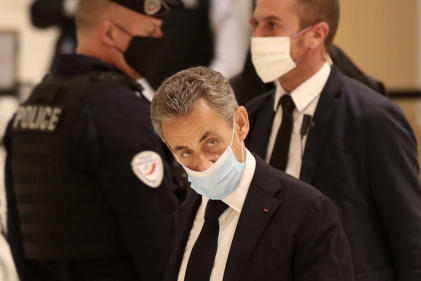

In [ ]:
import IPython
IPython.display.Image(soup.find("div", { "class" : "article article--main" }).find("img")['src'], width = 400)

###5.4 Description of the main article

In [ ]:
soup.find("div", { "class" : "article article--main" }).find("p", { "class" : "article__desc" }).get_text()

'A partir de lundi, l’ancien chef de l’Etat, poursuivi pour corruption et trafic d’influence, comparaît devant le tribunal correctionnel de Paris. Une première dans l’histoire de la Ve\xa0République'

## Exercices

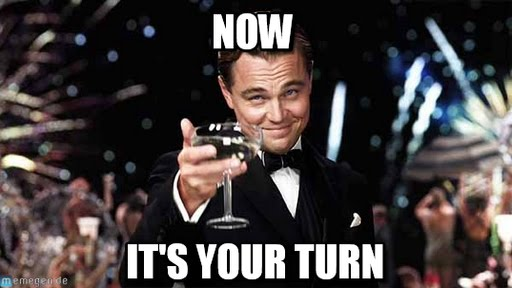

The goal of this exercice is to extract all possible information about the second article available on the web page.

In [ ]:
# Your code here

## Ressources
- [Beautifulsoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.html?highlight=href#)
- Tutorial [Real Python](https://realpython.com/beautiful-soup-web-scraper-python/)



---
Did you love it ? [Please visit my website](http://www.dcid-consulting.fr/) and lets' get in touch for special needs : consultancy, dedicated training, cut-in-the-edge development, etc.  
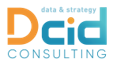Data science | Machine learning | Data analytics | Dataviz  